### Dynamics on Potential Function of Figure 3: Price of Anarchy, NeurIPS 2020
The Potential Function in this case is 
$U(x) = \frac{1}{2} \left( \alpha N x^2 + \beta N (1-x)^2 \right)$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def potential(x,a,b):
    
    U = (a**2)/2*((1-b)*x**2 + b*(1-x)**2);
    
    return U

In [3]:
def MWU(x0, b, a, n_step):
    
    xs = []
    ys = []
    
    x_current = x0
    
    xs.append(x_current)
    ys.append(potential(x_current, a,b))
    
    #begin the loops to update the dynamics
    for i in range(n_step):
        
        x_new = x_current/(x_current + (1-x_current)*np.exp(a*(x_current - b))) 
        xs.append(x_new)
        ys.append(potential(x_new, a,b))
        
        x_current = x_new
        
    return xs, ys

In [13]:
#initialization
x0 = 0.2
a= 7
b =0.7
n_step = 100

In [14]:
x = np.arange(0,1,0.001)
y = potential(x,a,b)

In [15]:
xs, ys = MWU(x0, b, a, n_step)

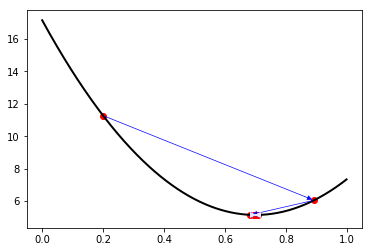

In [16]:
import matplotlib.cm as cm

f = plt.figure()
plt.plot(x, y, lw = 2, color = 'k')

cmap = cm.bwr

for i in range(1, n_step+1):
    
    c = cmap(i / n_step)

#     plt.scatter(xs[i], ys[i], c = c)
    plt.annotate('', xy=(xs[i], ys[i]), xytext=(xs[i-1], ys[i-1]),
                   arrowprops={'arrowstyle': '-|>', 'color': c, 'lw': 0.7},
                   va='center', ha='center',alpha=0.01)

plt.scatter(xs, ys, c = 'r')
# plt.savefig('changing_marker_color.png', dpi=80)
plt.show()
# fig.savefig('changing_marker_color.png', dpi=80)

# # Save the figure
f.savefig("potential_plot_a13p2.pdf", bbox_inches='tight')

# plt.savefig('changing_marker_color.png', dpi=80)